# Assignment 2: 2-Pack

In [1]:
from framework import *
# Please import as much code developed in lab2 as possible.

## Problem Description

The problem considers a set of $n$ rectangular boxes that are to be packed into a set of $m$ containers. Each box and each container has an $x$-length and a $y$-length. Furthermore each box as an associated weight $w$ that represents how important it is that the box is packed into a container. The aim of the problem is to pack as many boxes into containers as possible such that the sum of the weights of packed boxes is maximised. Note that boxes cannot overlap and must stay within the boundaries of the containers. A solution to a problem with four containers and 100 boxes is visualised below.



![title](images/lab2.png)



## Data

A number of data files have been generated. Data files are in the following format

$n$

$x^{container}_1$ $y^{container}_1$ 

$x^{container}_2$ $y^{container}_2$ 

...

$x^{container}_n$ $y^{container}_n$

$m$

$x^{box}_1$ $y^{box}_1$ $w^{box}_1$ 

$x^{box}_2$ $y^{box}_2$ $w^{box}_2$

...

$x^{box}_m$ $y^{box}_m$ $w^{box}_m$


## Part 1: Improved Corner Heuristic (50 marks)

### Incompleteness of original corner heuristic

In the accompanying computer lab to this assignment, we implemented a heuristic referred to as the corner heuristic, where new corners are created at the top-left and bottom-right of a box when it is inserted into a container. 

**1a) Provide a minimal counter example that demonstrates that the corner heuristic is incomplete, i.e., an instance of a 2-D packing problem where no matter what parameters the heuristic is given it will never find the optimal solution. Briefly explain your answer (15 marks).**

Your response:

### Improvements

The corner-heuristic can be improved based on the following observation - from any solution it is possible to construct a bottom-left aligned solution, i.e., a solution where no box can be moved downwards or leftwards feasibly. Hence to find an optimal solution we only need to search over the set of bottom-left aligned solutions.

The corner heuristic can be improved to only construct solutions that are bottom-left aligned by modifying the positions of the corners. More explicitly, when a box is inserted into a container, previously a new corner is inserted at the top-left and bottom-right of the new box. It is possible to improve the placements of these new corners as follows. The corner corresponding to the bottom-right of the new box can be extended downwards until it comes in contact with an existing box or the exterior of the container. Likewise, the corner corresponding to the top-left of the new box can be extended leftwards until it comes into contact with an existing box or the exterior of the container. This is illustrated below where the black pairs of arrows correspond to the old corners of box X and the red pairs of arrows correspond to the new pairs of arrows.

<img src="images/corner_extend.png" style="width: 250px;"/>

A complication that must be considered however is that when a box is inserted it might require the positions of these new types of existing corners to be updated. For example, consider the situation below where box X is inserted into the position shown. The corner (black) corresponding to the bottom-right of box A must now be updated to be above box X (red). Similarly the corner (black) corresponding to the top-left of box B must now be updated to be to the right of box X (red). 

<img src="images/corner_update.png" style="width: 300px;"/>


Even if the positions of the corners are implemented as described above if we are not careful it is still possible to generate solutions that are not bottom-left aligned. For example, consider the situation below where box X is inserted into the corner corresponding to the top-left of box A. Clearly box X is not bottom-aligned. This is an example of how some corners are not relevant to some boxes. More explicitly, if the distance between a corner and the corresponding box (in this case box A) is larger than the relevant length of box being inserted (in this case box X) then the corner can be ignored.

<img src="images/corner_relevant.png" style="width: 300px;"/>




**1b) Complete the add_new_corners function below to implement corners now in the improved positions (15 marks)**

**1c) Complete the update_existing_corners function below to update the existing corners (15 marks) **

Hint: To take advantage of the fact that we have already implemented the corner heuristic in the lab here we simply create an advanced_corner_handling function that replaces the basic_corner_handling function (please see the lab solutions).


In [2]:
def advanced_corner_handling(container, box, corner):
    return 0

In [3]:
def add_new_corners(container, corner, box):
    return 0

In [4]:
def update_existing_corners(container, box):
    return 0

**1d) Demonstrate the improved corner heuristic on instance file_1_20.txt (5 marks)**. Here we will be looking to see that all boxes are bottom-left aligned.

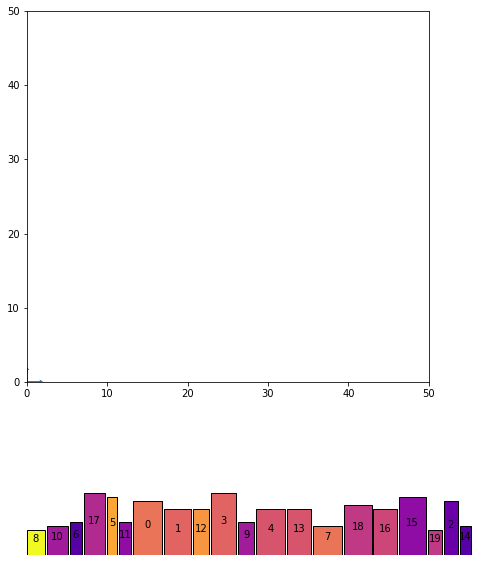

Solution objective is 0


In [5]:
test_data = Data("Data/file_1_20.txt")
solution = SolutionState(test_data.containers, test_data.boxes)
solution.plot()
print("Solution objective is {}".format(solution.objective()))


## Large Neighbourhood Search (50 marks)

Large Neighbourhood Search (LNS) is a single-solution based metaheuristic that aims to find high quality solutions to optimisation problems through iteratively destroying and repairing an incumbant solution. In the second part of this assignment we will build a LNS to the 2D packing problem.

Before the destroy and repair iterations of the Large Neighbourhood Search can begin, we must find an initial feasible solution to the problem

In [6]:
def initial_feasible_solution(data):
	"""Takes the data and returns a feasible solution where no boxes are packed into any containers"""

	return SolutionState(data.containers, data.boxes)

### Destroy

Here we partially *destroy* a solution to our problem by completely unpacking a number of containers. In this way, the boxes in the packed containers remain *fixed* whereas the unpacked containers are *relaxed*. Clearly, the number of containers that we unpack (the *degree of destruction*) will impact how the search progresses.

**2a) Complete the following function to partially destroy a given solution by completely unpacking a number of containers (10 marks)**

In [7]:
def destroy(incumbant_solution, degree_of_destruction=0.5):
    """Unpacks a certain number of containers"""
    return 0

### Repair

We repair a solution by using the (improved) corners heuristic to try to reinsert the unpacked boxes. Recall that there are a number of parameters, i.e. box order, container order, corner preference and direction preference, that will impact how the corner heuristic will construct a solution.

**2b) Complete the following function to reconstruct a solution. Exploit different parameters choices when using the corner heuristic (20 marks)**

In [8]:
def repair(solution):
    """Rebuilds a solution using the improved corner_heuristic where different parameter settings are selected"""
    return 0

In [9]:
def unchanged(list_of_objects):
	return list_of_objects


## Iterate

LNS works by iteratively destroying and repairing an incumbant solution. Applications of LNS often differ in how they update the incumbant solution. For example, the simplest version of LNS simply accepts any new solution that has an objective function that is at least as good as the current incumbant. This can be thought of as a hill-climbing method. More advanced methods, such as Simulated-Annealing, allow the possibly for the incumbant solution to be replaced by a solution with a worse objective. 

**2c) Implement a LNSSolver that iteratively repairs and detroys a solution using your detroy and repair operators and updates the incumbant solution appropriately (10 marks)** - Please explain your method for accepting new solutions.

Explanation: 

In [10]:
def LNSSolver(data, number_iterations):
    incumbant_solution = initial_feasible_solution(data)
    return incumbant_solution

**2d) Evaluate your LNS solver on instance file_4_100.txt. (10 marks)** 

Hint: You should be aiming for a solution with an objective above 800

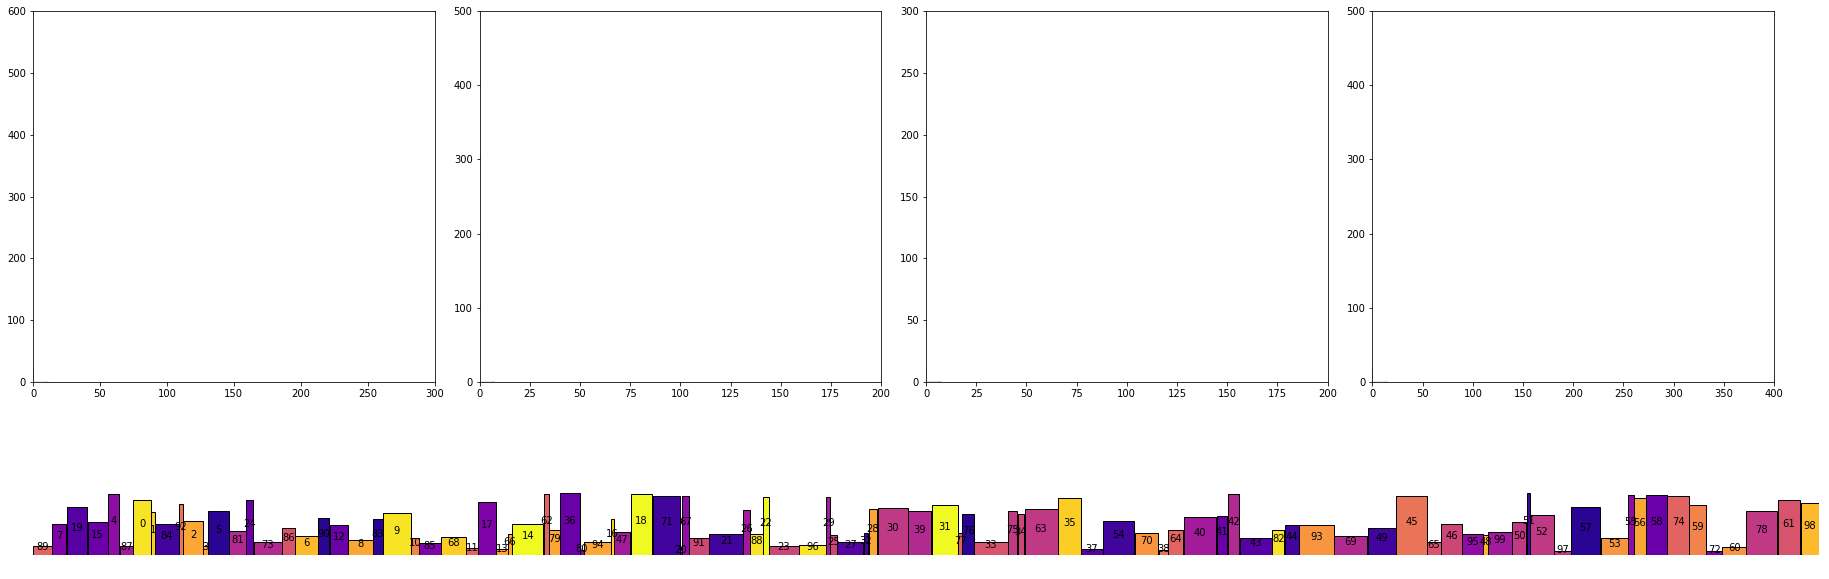

0

In [11]:
data = Data("Data/file_4_100.txt")
n_iterations = 0
lns = LNSSolver(data, n_iterations)
lns.plot()
lns.objective()